<a href="https://colab.research.google.com/github/prtk0007/Pneumonia-Covid19-detection/blob/main/Predictor_1class_2class_3class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from tensorflow.keras.models import Sequential,load_model,save_model
#from keras.applications.resnet50 import ResNet50
#from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import preprocess_input
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:


test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)


In [ ]:
test_set = test_datagen.flow_from_directory('/content/test',
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            shuffle=False,
                                            class_mode = 'binary')

Found 624 images belonging to 2 classes.


# ##Single image Prediction

In [ ]:
model = load_model('/content/drive/MyDrive/Kaggle/Inceptv3_xray.h5')

In [ ]:
def predict(img):
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  img_data = preprocess_input(x)
  classes = model.predict(img_data)
  print("Actual class: ", actual)
  if classes[0][0] > 0.65:
          print("Predicted class: Normal")
          return 'NORMAL'
  else:
          print("Predicted class: Pneumonia")
          return 'Pneumonia'


Enter the Absolute path of image/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/test/PNEUMONIA/person100_bacteria_480.jpeg
Actual class:  PNEUMONIA
Predicted class: Pneumonia


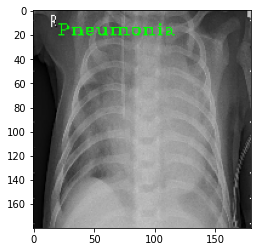

In [ ]:
path = input("Enter the Absolute path of image")
actual= os.path.basename(os.path.dirname(path))
img = image.load_img(path, target_size=(180,180))
pred = predict(img)
texted_img = cv2.putText(img=np.copy(img),text=pred,org=(20,20),fontFace=5,fontScale=0.7,color=(0,255,0))
plt.imshow(texted_img)

Actual class:  NORMAL
Predicted class: Normal


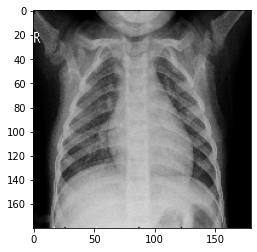

In [ ]:
path = '/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1436-0001.jpeg'
actual= os.path.basename(os.path.dirname(path))
img = image.load_img(path, target_size=(180,180))
plt.imshow(img)
x=image.img_to_array(img)
x /= 255.0
x=np.expand_dims(x, axis=0)
classes = model.predict(img_data)
print("Actual class: ", actual)
if classes[0][0] > 0.65:
        print("Predicted class: Normal")
else:
        print("Predicted class: Pneumonia")

# ### 2 class Image prediction

In [ ]:
preds_binary = model.predict(test_set,verbose=1)

In [ ]:
import matplotlib.pyplot as plt #For Visualization
import numpy as np
test_set.reset()
x=np.concatenate([test_set.next()[0] for i in range(test_set.__len__())])
y=np.concatenate([test_set.next()[1] for i in range(test_set.__len__())])
print(x.shape)
print(y.shape)

(624, 224, 224, 3)
(624,)


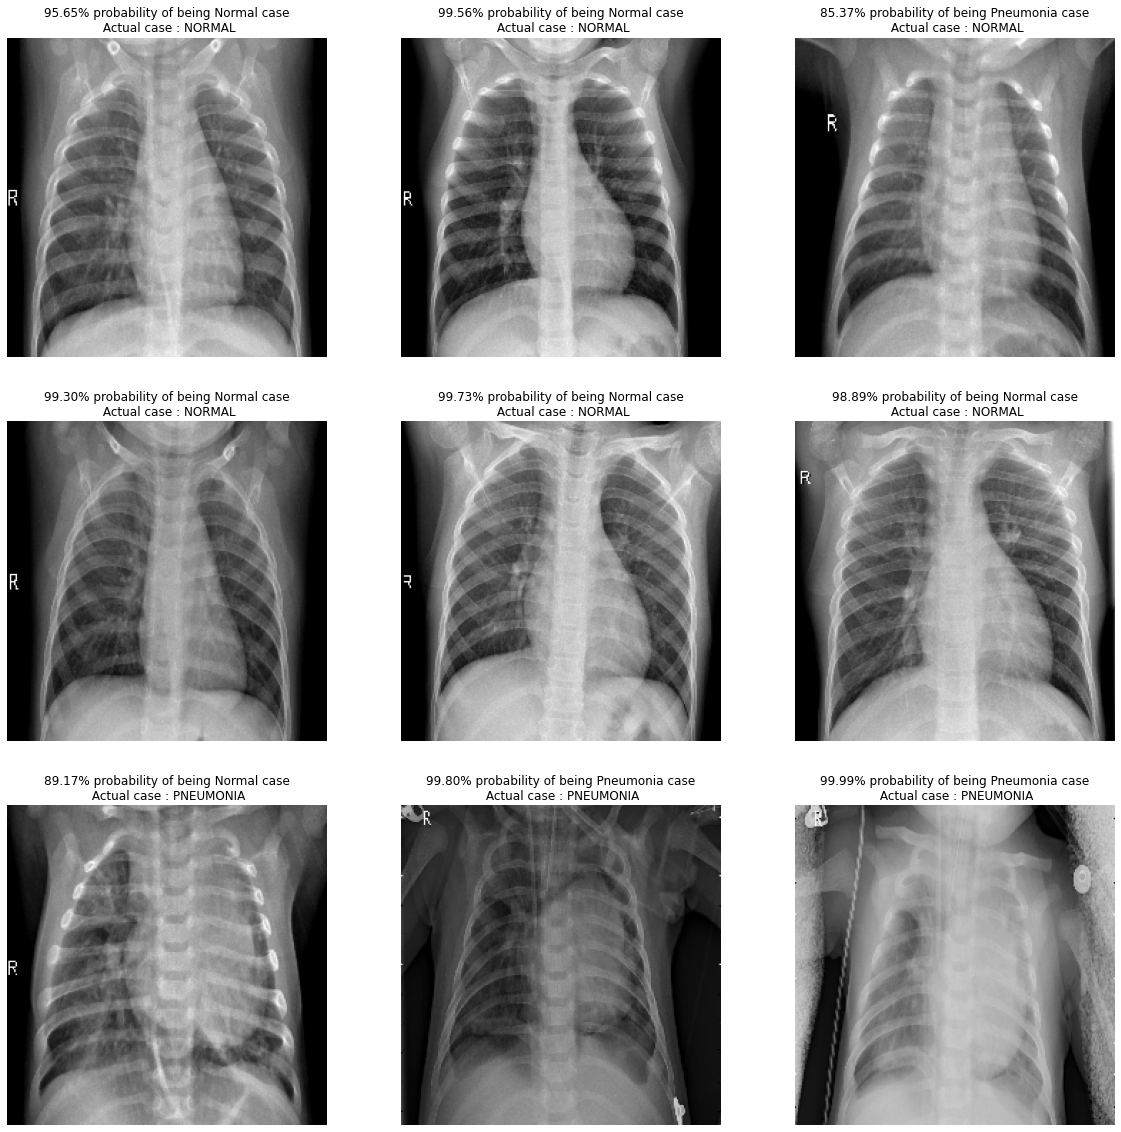

In [ ]:
dic = {0:'NORMAL', 1:'PNEUMONIA'}
plt.figure(figsize=(20,20))
for i in range(0+228, 9+228):
  plt.subplot(3, 3, (i-228)+1)
  if preds_binary[i, 0] >= 0.5: 
      out = ('{:.2%} probability of being Pneumonia case'.format(preds_binary[i][0]))
      
      
  else: 
      out = ('{:.2%} probability of being Normal case'.format(1-preds_binary[i][0]))
      
      

  plt.title(out+"\n Actual case : "+ dic.get(y[i]))    
  plt.imshow(np.squeeze(x[i]))
  plt.axis('off')
plt.show()

# ##3 Class multiple image prediction

In [ ]:
model3 = load_model('/content/drive/MyDrive/Kaggle/3_class_scratch_softmax_acc94.h5')   ## load 3 class model 

In [ ]:
def predict(img):
  x=image.img_to_array(img)
  x /= 255.0
  x=np.expand_dims(x, axis=0)
  classes = model3.predict(x)
  return classes

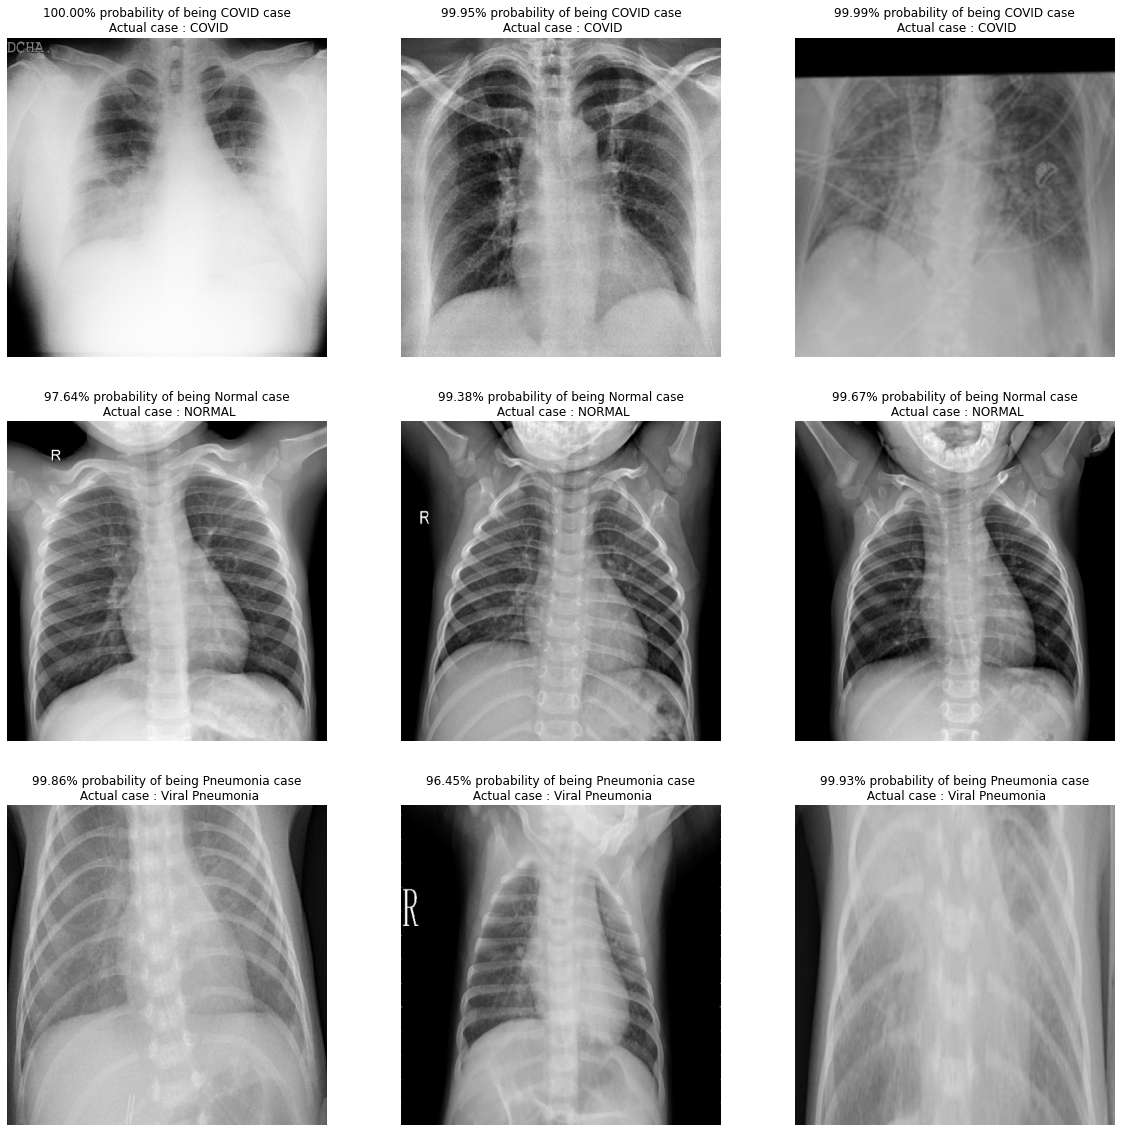

In [ ]:
import os
import random
import matplotlib.pyplot as plt #For Visualization
import numpy as np

path = "/content/drive/MyDrive/Covid git/Data/val/"
dirs  = list(filter(lambda dir: os.path.isdir(os.path.join(path, dir)), os.listdir(path)))
plt.figure(figsize=(20,20))
j=0
for i in range(len(dirs)):
  for x in range(1,4):
    dir_chosen = dirs[i]
    files_path = os.path.join(path, dir_chosen)
    files = list(filter(lambda file: os.path.isfile(os.path.join(files_path, file)), os.listdir(files_path)))
    file_chosen = files[random.randrange(len(files))]
    img = image.load_img(os.path.join(files_path, file_chosen), target_size=(500,500))
    pred = predict(img)
    prediction = np.argmax(pred)
    plt.subplot(3, 3, (x-1)+1+j)
    if prediction == 0:
      out = ('{:.2%} probability of being COVID case'.format(pred[0][0]))
    elif prediction == 1:
      out = ('{:.2%} probability of being Normal case'.format(pred[0][1]))
    else:
      out = ('{:.2%} probability of being Pneumonia case'.format(pred[0][2]))
    plt.title(out+"\n Actual case : "+ dir_chosen)
    plt.imshow(img)
    plt.axis('off')
  j=j+3

In [ ]:
pred

array([[9.9999762e-01, 4.1419204e-07, 2.0578873e-06]], dtype=float32)

In [ ]:
pred[0][2]

2.0578873e-06